# Merge sort vs Insertion sort
### David Rackerby

### Hypothesis
To sort an array, Merge sort and Insertion sort have worst case time-complexities of $O(N log N)$ and $O(N^2)$ respectively. It's expected that for larger input sizes, Merge sort will outperform Insertion sort. However, the overhead associated with Merge sort's recursion and memory-allocation will likely cause Insertion sort to outperform it on smaller input sizes. We hypothesize that this occurs on input sizes between 12 and 16 elements.

### Methods
We will use a pseudo-random number generator to generate arrays of random elements sorting various sizes of them using standard implementations of Merge sort and Insertion sort. Arrays from sizes 0 to 1,000 will be sorted. We will measure and compare their runtimes for each input size and determine for which input size does Merge sort outperform Insertion sort. The code will be provided inline with this document. The version of Python used is Python 3.11.2. The version of Matplotlib used is 3.7.1. The pseudo-random number generator used is the Mersenne Twister, which is Python's default generator.

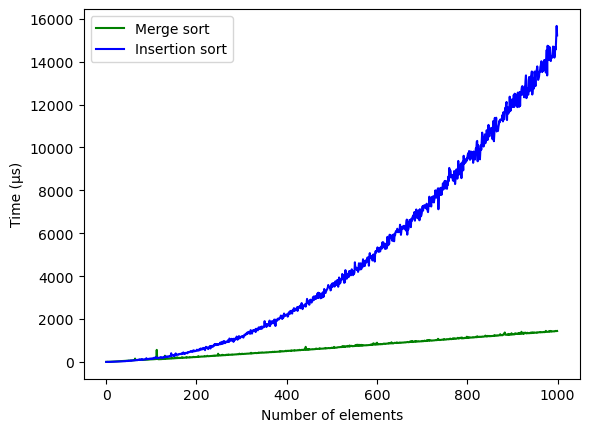

In [21]:
import matplotlib.pyplot as plt

import random
from typing import List
import time

def merge_sort(data: List[int]) -> None:
    N = len(data)
    if N <= 1:
        return
    
    middle = N // 2
    left = data[:middle]
    right = data[middle:]
    
    merge_sort(left)
    merge_sort(right)
    
    left_index = right_index = 0
    while left_index + right_index < N:
        if left_index < len(left) and \
                (right_index >= len(right) or left[left_index] <= right[right_index]):
            data[left_index + right_index] = left[left_index]
            left_index += 1
        else:
            data[left_index + right_index] = right[right_index]
            right_index += 1

def insertion_sort(data: List[int]) -> None:
    for i in range(1, len(data)):
        curr_element = data[i]
        
        j = i - 1
        while j >= 0 and curr_element <= data[j]:
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = curr_element
        

random.seed(431)
NUM_ELEMENTS = 1_000

population = [random.randint(0, NUM_ELEMENTS) for _ in range(NUM_ELEMENTS)]
merge_sort_times = [0] * NUM_ELEMENTS
insertion_sort_times = [0] * NUM_ELEMENTS

for k in range(NUM_ELEMENTS):
    sample = random.choices(population, k=k)
    merge_copy = sample[:]
    insertion_copy = sample[:]

    start_merge = time.monotonic_ns()
    merge_sort(data=merge_copy)
    end_merge = time.monotonic_ns()
    
    # Convert to microseconds
    merge_sort_times[k] = 0.001 * (end_merge - start_merge)

    start_insertion = time.monotonic_ns()
    insertion_sort(data=insertion_copy)
    end_insertion = time.monotonic_ns()
    
    insertion_sort_times[k] = 0.001 * (end_insertion - start_insertion) 

plt.plot(merge_sort_times, 'g', label="Merge sort")
plt.plot(insertion_sort_times, 'b', label="Insertion sort")
plt.xlabel("Number of elements")
plt.ylabel("Time (μs)")
plt.legend()
plt.show()

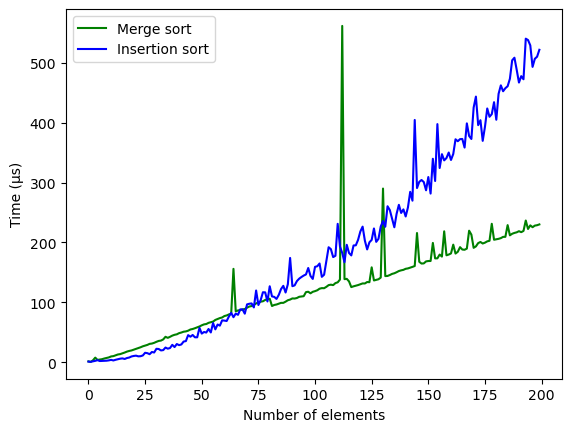

In [22]:
plt.plot(merge_sort_times[:200], 'g', label="Merge sort")
plt.plot(insertion_sort_times[:200], 'b', label="Insertion sort")
plt.xlabel("Number of elements")
plt.ylabel("Time (μs)")
plt.legend()
plt.show()

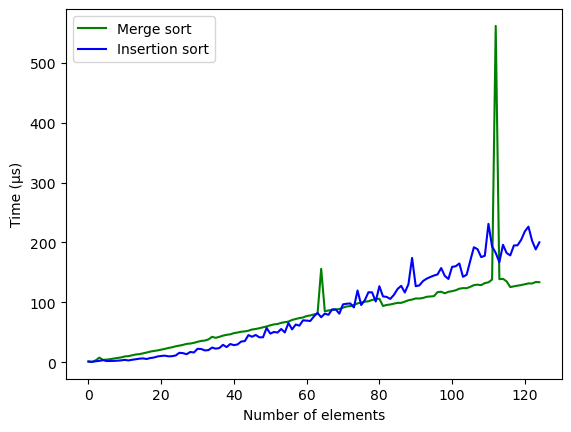

In [23]:
plt.plot(merge_sort_times[:125], 'g', label="Merge sort")
plt.plot(insertion_sort_times[:125], 'b', label="Insertion sort")
plt.xlabel("Number of elements")
plt.ylabel("Time (μs)")
plt.legend()
plt.show()

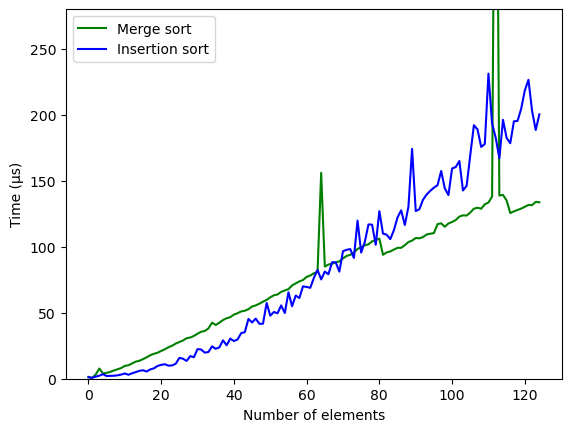

In [24]:
# Zoom in on half of the highest time
plt.plot(merge_sort_times[:125], 'g', label="Merge sort")
plt.plot(insertion_sort_times[:125], 'b', label="Insertion sort")
plt.xlabel("Number of elements")
plt.ylabel("Time (μs)")

maxtime = max(max(merge_sort_times[:125]), max(insertion_sort_times[:125]))
y_limit = maxtime // 2
plt.ylim([0, y_limit])

plt.legend()
plt.show()

### Results
In all runs, the sorting algorithms sort the same data. Both curves measure time (in microseconds) versus input size. Once $N \ge 150$, Merge sort's performance overtakes that of Insertion sort. Hence, we focus on the results below that range, eventually focusing on the graph where we can best observe the overlap in performance.

### Discussion
The input size at which Insertion sort outperformed Merge sort was surprising. We initially hypothesized 12 to 16 to be the range of overlap, but the results show the range of overlap is around 65 to 80 elements. While $N \lt 65$, Insertion sort was always able to sort in less time than Merge sort. Within the overlap range, that consistency vanishes. Once $N \gt 80$, Merge sort's better asymptotic performance is consistently exhibited.

### Conclusions
The test results show that for $N \lt 65$, Insertion sort is faster than Merge sort. For $65 \le N \le 80$ there is overlap in performance. When $N \ge 80$, Merge sort's runtime performance overtakes Insertion sort's.